# S&P500 Exploratory models

Let's take our simple OLS model and create a trading strategy

In [23]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
model = pickle.load(open('../../models/simple_ols.pkl', 'rb'))

df = pd.read_csv('../../models/simple_ols.csv', parse_dates=['Date'])
df = df.set_index('Date')
df

,returns_actual,returns_pred
Date,,
2011-01-01,0.033096,-0.390544
2011-02-01,0.030017,-0.392783
2011-03-01,-0.012588,-0.395506
2011-04-01,0.020713,-0.398078
2011-05-01,0.005107,-0.400667
...,...,...
2017-12-01,0.027271,-0.432597
2018-01-01,0.047089,-0.432701
2018-02-01,-0.030339,-0.435856


Let's deploy a basic, no transaction cost, immediate execution, 'EMH exists', strategy
We go long if we predict a positive return, we go short if we predict a negative return

In [29]:
df_sign = np.sign(df)
correct_sign = df_sign.iloc[:, 0] == df_sign.iloc[:, 1]
# TODO: CHeck below
df['strategy_return'] = df['returns_actual'] 
df.loc[correct_sign, 'strategy_return'] = np.abs(df.loc[correct_sign, 'strategy_return'])
df.loc[~correct_sign, 'strategy_return'] = -np.abs(df.loc[~correct_sign, 'strategy_return'])

df['strategy_return_cum'] = (1 + df['strategy_return']).cumprod() - 1
df

,returns_actual,returns_pred,strategy_return,strategy_return_cum
Date,,,,
2011-01-01,0.033096,-0.390544,-0.033096,-0.033096
2011-02-01,0.030017,-0.392783,-0.030017,-0.062120
2011-03-01,0.012588,-0.395506,-0.012588,-0.073925
2011-04-01,0.020713,-0.398078,-0.020713,-0.093107
2011-05-01,0.005107,-0.400667,-0.005107,-0.097739
...,...,...,...,...
2017-12-01,0.027271,-0.432597,-0.027271,-0.839029
2018-01-01,0.047089,-0.432701,-0.047089,-0.846609
2018-02-01,0.030339,-0.435856,-0.030339,-0.851263


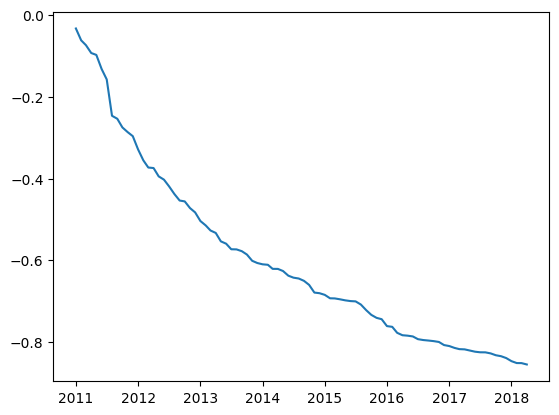

In [30]:
plt.plot(df['strategy_return_cum'])

In [27]:
# Implement more methods to validate model performance